In [1]:
import numpy as np
import matplotlib.pyplot as plt

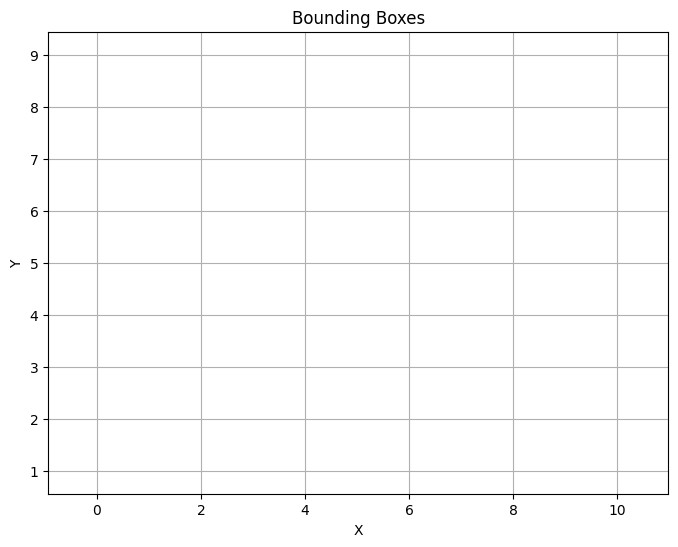

In [4]:
point_cloud = np.random.rand(100, 3)

# delete the z-coordinate
def project_points_to_ground(points):
    return points[:, :2] 

# check if two rectangles overlap
def is_overlap(rect1, rect2):
    return not (rect1[1][0] < rect2[0][0] or rect2[1][0] < rect1[0][0] or rect1[1][1] < rect2[0][1] or rect2[1][1] < rect1[0][1])

bounding_boxes = []

for obj_points in point_cloud:
    projected_points = project_points_to_ground(obj_points.reshape(1, -1))

    min_x, min_y = np.min(projected_points, axis=0)
    max_x, max_y = np.max(projected_points, axis=0)
    bounding_box = [(min_x, min_y), (max_x, max_y)]

    overlap = False
    for existing_box in bounding_boxes:
        if is_overlap(existing_box, bounding_box):
            overlap = True
            break
    if not overlap:
        bounding_boxes.append(bounding_box)

plt.figure(figsize=(8, 6))
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Bounding Boxes')

for box in bounding_boxes:
    width = box[1][0] - box[0][0]
    height = box[1][1] - box[0][1]
    plt.gca().add_patch(plt.Rectangle(box[0], width, height, fill=None, edgecolor='r'))

x_min = min(box[0][0] for box in bounding_boxes) - 1
x_max = max(box[1][0] for box in bounding_boxes) + 1
y_min = min(box[0][1] for box in bounding_boxes) - 1
y_max = max(box[1][1] for box in bounding_boxes) + 1

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)

plt.axis('equal')
plt.grid(True)
plt.show()
